Dataset link - https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement


In [521]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [522]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
validate=pd.read_csv('sample_submission.csv')


In [523]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [639]:
validate.head(50)

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
5,LP001054,N
6,LP001055,N
7,LP001056,N
8,LP001059,N
9,LP001067,N


In [525]:
test.shape

(367, 12)

In [526]:
validate.shape

(367, 2)

In [527]:
validate.isnull().sum()

Loan_ID        0
Loan_Status    0
dtype: int64

In [528]:
train.isnull().sum().sort_values(ascending=False)*100/len(train)

Credit_History       8.143322
Self_Employed        5.211726
LoanAmount           3.583062
Dependents           2.442997
Loan_Amount_Term     2.280130
Gender               2.117264
Married              0.488599
Loan_ID              0.000000
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [529]:
test.isnull().sum().sort_values(ascending=False)*100/(len(test))

Credit_History       7.901907
Self_Employed        6.267030
Gender               2.997275
Dependents           2.724796
Loan_Amount_Term     1.634877
LoanAmount           1.362398
Loan_ID              0.000000
Married              0.000000
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
dtype: float64

In [530]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [531]:
test.shape


(367, 12)

In [532]:
train.drop(['Loan_ID'],axis=1,inplace=True)
test.drop(['Loan_ID'],axis=1,inplace=True)
test.shape

(367, 11)

In [533]:
df_num = train.select_dtypes(include=np.number).columns
df_num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [534]:
df_cat = train.select_dtypes(exclude=np.number).columns
df_cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [535]:
# for col in df_cat:
#     try:
#         train[col]=train[col].fillna(np.nan)
#         test[col]=test[col].fillna(np.nan)
#     except:
#         continue
#     print(f"train[{col}] ---> {train[col].unique()}")
#     print(f"test[{col}] ---> {test[col].unique()}")

In [536]:
train.describe(include=np.number)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [537]:
train= train.replace({
                     'Gender':{'Male':0,'Female':1},
                     'Married':{'No':0,'Yes':1},
                     'Dependents':{'0':0,'1':1,'2':2,'3+':3},
                     'Education':{'Graduate':1,'Not Graduate':0},
                     'Self_Employed':{'No':0,'Yes':1},
                     'Property_Area':{'Urban':2,'Rural':0,'Semiurban':1},
                     'Loan_Status' : {'Y':1,'N':0}
                    })

test = test.replace({
                     'Gender':{'Male':0,'Female':1},
                     'Married':{'No':0,'Yes':1},
                     'Dependents':{'0':0,'1':1,'2':2,'3+':3},
                     'Education':{'Graduate':1,'Not Graduate':0},
                     'Self_Employed':{'No':0,'Yes':1},
                     'Property_Area':{'Urban':2,'Rural':0,'Semiurban':1}
                    })

In [538]:
test.shape

(367, 11)

 # Plotting 
### Different kinds of Plotting for Univariate, Bivariate & Multivariate Graphical analysis

# Numerical vs Numerical 

    scattered plot - tells us about linear/non-liear relation (correlation) 
                between 2 numerical variables
    overlapping scattered plot/relplot - same as above but capture 2 features 
    boxplot - useful for outlier detection

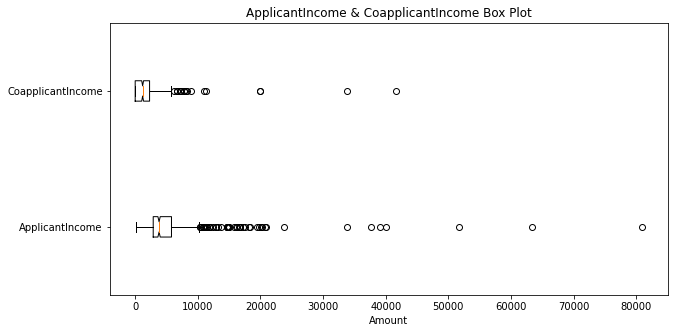

In [539]:
data = [train['ApplicantIncome'],train['CoapplicantIncome']]
# for col in df_num:
#     data.append(train[col])
#     # plt.boxplot(train[col]) # this will print all feature differently
fig = plt.figure(figsize=(10,5))
ax=plt.subplot(111)
plt.boxplot(data,vert=False,notch=True)
ax.set_yticklabels(['ApplicantIncome', 'CoapplicantIncome'])
plt.xlabel('Amount')
plt.title('ApplicantIncome & CoapplicantIncome Box Plot')
plt.show()

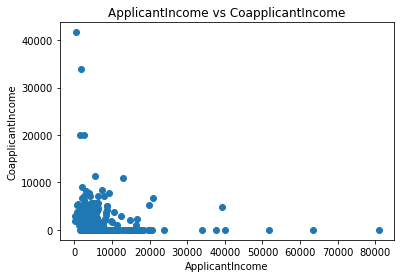

In [540]:
#sns.boxplot(train['ApplicantIncome'],train['CoapplicantIncome'])
plt.scatter(train['ApplicantIncome'],train['CoapplicantIncome'])
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.title('ApplicantIncome vs CoapplicantIncome')
plt.show()

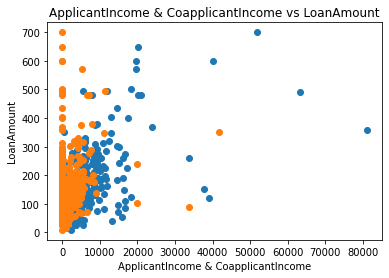

In [541]:
plt.scatter(train['ApplicantIncome'],train['LoanAmount'])
plt.scatter(train['CoapplicantIncome'],train['LoanAmount'])
plt.xlabel('ApplicantIncome & CoapplicantIncome')
plt.ylabel('LoanAmount')
plt.title('ApplicantIncome & CoapplicantIncome vs LoanAmount')
plt.show()

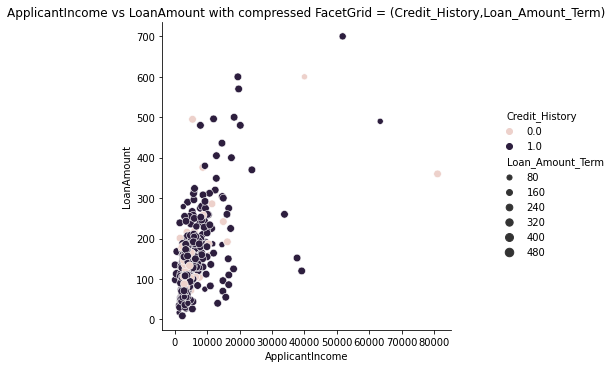

In [542]:
sns.relplot(x='ApplicantIncome',y='LoanAmount', hue='Credit_History', 
                size='Loan_Amount_Term',data=train)
plt.title('ApplicantIncome vs LoanAmount with compressed FacetGrid = (Credit_History,Loan_Amount_Term)')
plt.show()

# Single Numerical Frequency

    histogram - good for understanding distribution of individual 
                continuous numerical variable
    distplot - histogram + kde PDF plot


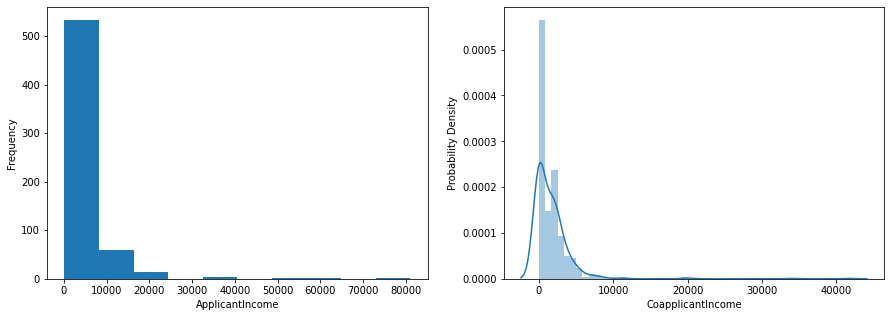

In [543]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(121)
ax2=plt.subplot(122)
ax1.hist(train['ApplicantIncome'],bins=10)
ax1.set_xlabel('ApplicantIncome')
ax1.set_ylabel('Frequency')
ax2=sns.distplot(train['CoapplicantIncome'])
ax2.set_xlabel('CoapplicantIncome')
ax2.set_ylabel('Probability Density')
plt.show()

# Categorical vs Categorical

    countplot - histograms across a categorical variable
    swarmplot - scatterplot on categorical feature (useful when number 
                    of inputs are small)
    scatterplot - all 4 categorical, 3 categorical & 1 numerical
    kdeplot - plot of two categorical variable while keeping another one constant

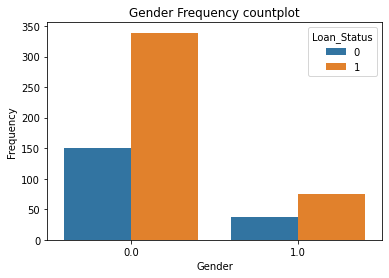

In [544]:
sns.countplot(x='Gender',hue='Loan_Status',data=train)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Frequency countplot')
plt.show()


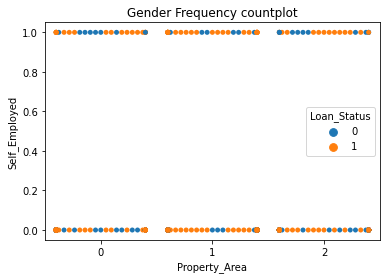

In [545]:
sns.swarmplot(x='Property_Area',y='Self_Employed',hue='Loan_Status',data=train)
plt.xlabel('Property_Area')
plt.ylabel('Self_Employed')
plt.title('Gender Frequency countplot')
plt.show()

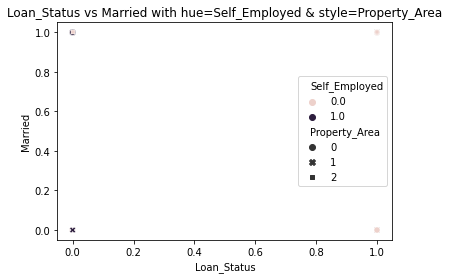

In [546]:
sns.scatterplot(x='Loan_Status',y='Married',hue='Self_Employed',style='Property_Area',data=train)
plt.xlabel('Loan_Status')
plt.ylabel('Married')
plt.title('Loan_Status vs Married with hue=Self_Employed & style=Property_Area')
plt.show()

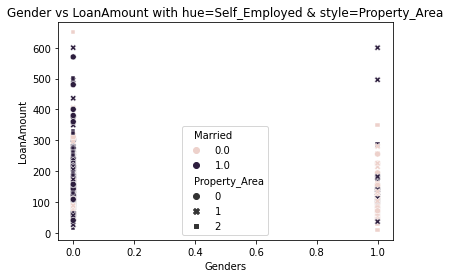

In [547]:
sns.scatterplot(x='Gender',y='LoanAmount',hue='Married',style='Property_Area',data=train)
plt.xlabel('Genders')
plt.ylabel('LoanAmount')
plt.title('Gender vs LoanAmount with hue=Self_Employed & style=Property_Area')
plt.show()

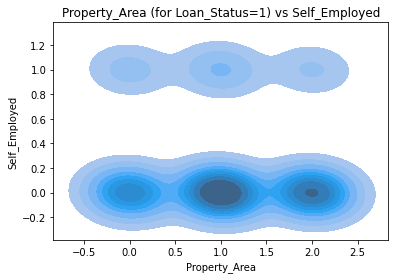

In [548]:
sns.kdeplot(train[train['Loan_Status']==1]['Property_Area'],train['Self_Employed'],shade=True)
plt.title('Property_Area (for Loan_Status=1) vs Self_Employed')
plt.show()

# Numerical vs Categorical 

    barplot - estimate of central tendency for a numerical variable for each 
            class on the x axis
    boxplot - useful for outlier detection , here we can use it with hue to study 
            the effect of Numerical feature based on 2 categorical feature
    FacetGrid + histogram - 1 numerical continuous, 2 categorical 
                    (here 'Credit_History' works as categorical)
    catplot - relationship between a numerical and one or more categorical 
                variables
    

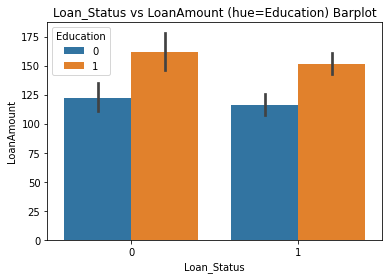

In [549]:
sns.barplot(y='LoanAmount',x='Loan_Status',hue='Education',data=train)
plt.xlabel('Loan_Status')
plt.ylabel('LoanAmount')
plt.title('Loan_Status vs LoanAmount (hue=Education) Barplot')
plt.show()

# plt.scatter(train['Loan_Status'],train['ApplicantIncome'])
# sns.boxplot(train['ApplicantIncome'],train['CoapplicantIncome'])

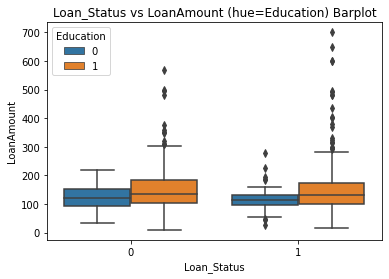

In [550]:
sns.boxplot(y='LoanAmount',x='Loan_Status',hue='Education',data=train)
plt.xlabel('Loan_Status')
plt.ylabel('LoanAmount')
plt.title('Loan_Status vs LoanAmount (hue=Education) Barplot')
plt.show()


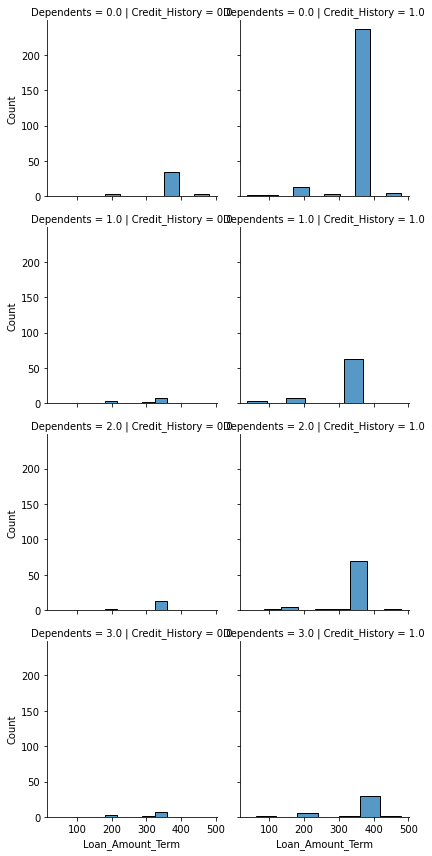

In [551]:
g = sns.FacetGrid(train,col='Credit_History', row='Dependents')
g.map_dataframe(sns.histplot, x='Loan_Amount_Term')

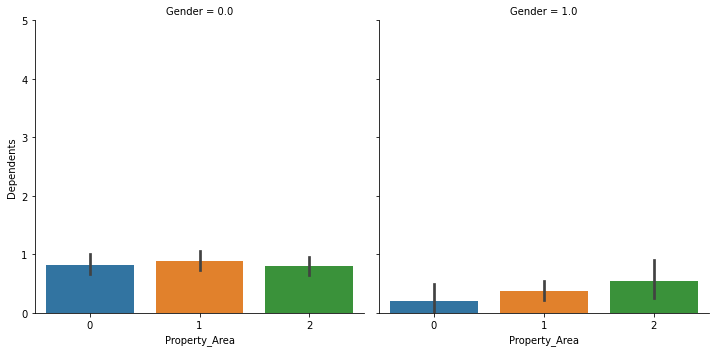

In [552]:
g = sns.catplot(x='Property_Area',y='Dependents', col = 'Gender', data=train,kind='bar')
g.set_axis_labels('Property_Area','Dependents')
g.set(ylim=(0,5))
plt.tight_layout()
g.add_legend()

# Multivariate 
    heatmap - relation between all variables(here taking categorical only)
    clustermap - relation between all categorical variable
    pairplot - correlation between numerical variables

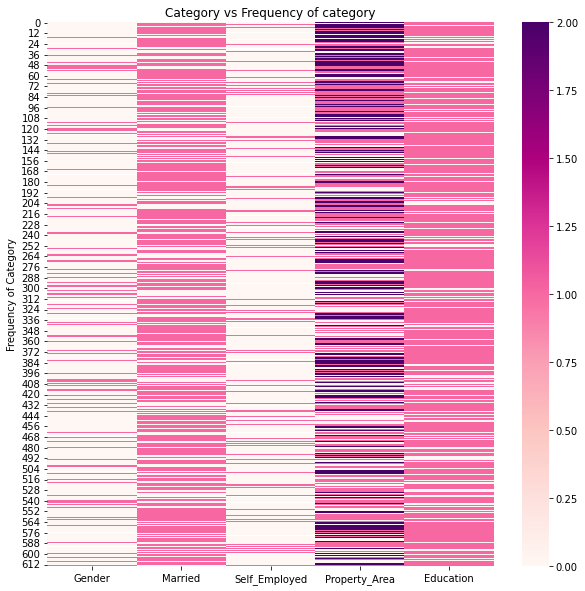

In [553]:
df_c = train[['Gender', 'Married', 'Self_Employed','Property_Area','Education']]
fig=plt.figure(figsize=(10,10))
sns.heatmap(df_c,robust=True,cmap='RdPu')
plt.ylabel('Frequency of Category')
plt.title('Category vs Frequency of category')
plt.show()

In [554]:
from scipy.cluster.hierarchy import dendrogram, linkage

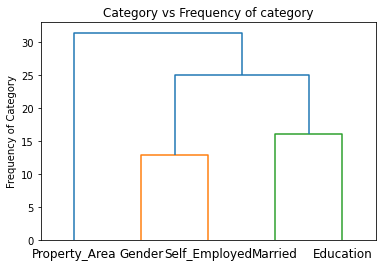

In [555]:
cols = ['Gender','Married','Education','Self_Employed','Property_Area']
df_c=[]
for col in cols:
   tmp = train[col]
   tmp.fillna(tmp.mode()[0],inplace=True)
   df_c.append(tmp)


Z = linkage(df_c, 'ward')
dn = dendrogram(Z,labels=cols)
plt.ylabel('Frequency of Category')
plt.title('Category vs Frequency of category')
plt.show()

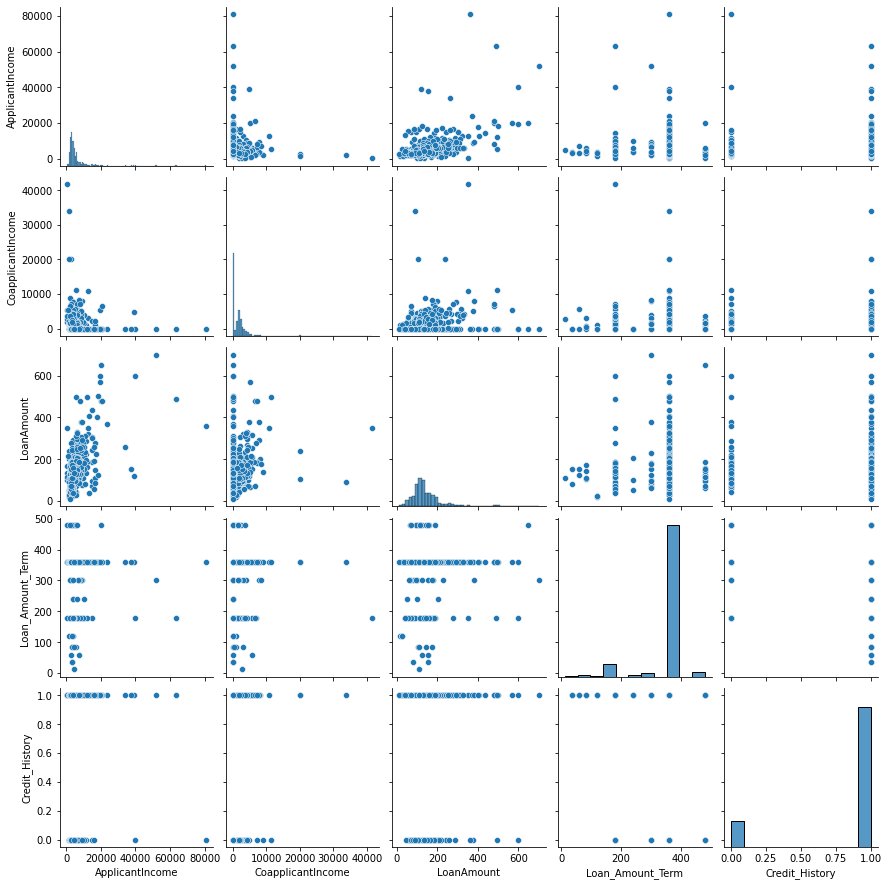

In [556]:
df_n=train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]
sns.pairplot(data=df_n)


In [557]:
test.shape

(367, 11)

# Handeling Missing Value
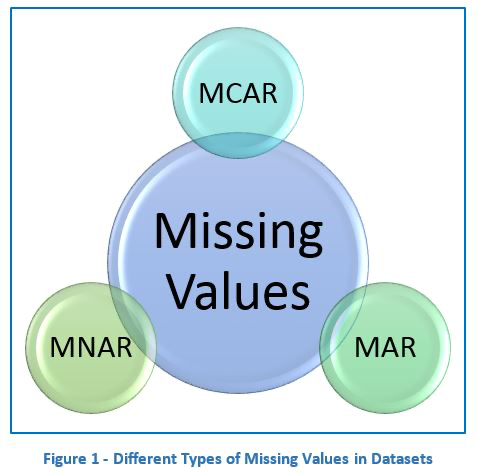

In [558]:
def random_sample_imputation(data):
    df_num=data.select_dtypes(include=np.number)
    df_cat=data.select_dtypes(exclude=np.number)
    
    for col in df_num:
        try:
            nan_value=data[col].isnull().sum()
            random_value=data[col].dropna().sample(nan_value,random_state=42)
            data.loc[data[col].isnull(),col]=random_value.values[0]
        except: continue
    
    for col in df_cat:
        try:
            nan_value=data[col].isnull().sum()
            random_value=data[col].dropna().sample(nan_value,random_state=42)
            data.loc[data[col].isnull(),col]=random_value.values[0]
        except: continue
        
    return data

In [559]:
df=train.copy(deep=True)
df = random_sample_imputation(df)
df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [560]:
train=df
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [561]:
df=test.copy(deep=True)
df = random_sample_imputation(df)
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [562]:
test=df
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [563]:
def drop_by_axis(data,axs,pct):
    #pct% or less columns not-nan rest of (100-pct)%  or more nan we drop that row 
    if axs==0: 
        min_cnt = int(pct*data.shape[1]+1)
    #pct% or less rows not-nan rest of (100-pct)%  or more nan we drop that column 
    else: 
        min_cnt = int(pct*df.shape[0]+1)
        
    try: data=data.dropna(axis=axs,thres=min_cnt)
    except: pass
    return data


In [564]:
# df=train.copy(deep=True)
# pct,axs = 0.5 , 0 # row elemination
# df = drop_by_axis(df,axs,pct)
# df.isnull().sum()
# df.shape

In [565]:
def CT_imputation(data):
    df_num=data.select_dtypes(include=np.number)
    df_cat=data.select_dtypes(exclude=np.number)
    for col in df_num:
        try: 
            mean_=data[col].mean()
            std_=data[col].std()
            is_null_=data[col].isnull().sum()
            rand_=np.random.choice([mean_- std_,mean_ + std_,is_null_])
            data[col].fillna(rand_,inplace=True)
        except: continue
    for col in df_cat:
        try: data[col].fillna(data[col].mode()[0],inplace=True)
        except: continue
    return data


In [566]:
# df=train.copy(deep=True)
# df = CT_imputation(df)
# df.isnull().sum()
# df.shape

### Wilcoxon Signed-Rank Test 
    In some cases, the data samples may be paired.

### Kruskal-Wallis H Test

    When working with significance tests, such as Mann-Whitney U and the 
    Wilcoxon signed-rank tests, comparisons between data samples must 
    be performed pair-wise.

    This can be inefficient if you have many data samples and you are only 
    interested in whether two or more samples have a different distribution.

In [567]:
# from scipy.stats import mannwhitneyu

In [568]:
def non_parametric(data):
    tmp=data.copy(deep=True)
    try:
        tmp.dropna(inplace=True)
        data1=tmp.sample(frac =0.3)
        cond=tmp.isin(data1)
        tmp.drop(tmp[cond].index,inplace=True)
        data2=tmp.sample(frac=len(data1)/len(tmp))
        stat, p = mannwhitneyu(data1, data2)
        if p>alpha:
            return True
        else:
            return False
    except: return False



In [569]:
def outlier_imputation_numerical(data):
    df_num=data.select_dtypes(include=np.number)
    for col in df_num:
        try: isnormal = non_parametric(data[col])
        except: isnormal = False
        if isnormal==True:
            std_=data[col].std()
            mean_=data[col].mean()
            right_tailed=mean+3*std #using this from pairplot
            left_tailed=mean-3*std
            data[col].fillna(value=right_tailed,inplace=True)
        else:
            q3=data[col].quantile(0.75)
            q1=data[col].quantile(0.25)
            iqr=q3-q1
            lower_bound=q1-1.5*iqr # higher density in lower_bound from pairplot
            upper_bound=q3+1.5*iqr
            data[col].fillna(value=lower_bound,inplace=True) 

    return data

In [570]:
# df=train.copy(deep=True)
# df_num = outlier_imputation_numerical(df)
# df_num.isnull().sum()
# df.shape

In [571]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer #for multivariate imputation
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer 

In [572]:
def algo_imputer(data):
    #rfg=RandomForestRegressor()
    #imputer=IterativeImputer(estimator=rfg,max_iter=8,random_state=42)
    imputer=KNNImputer(n_neighbors=10,weights='distance')
    data=imputer.fit_transform(data)
    print(imputer.feature_names_in_)
    return data

In [573]:
# df=train.copy(deep=True)
# df = algo_imputer(df)
# df.shape

In [574]:
from sklearn.linear_model import LinearRegression

    Credit_History       8.143322
    Self_Employed        5.211726
    LoanAmount           3.583062
    Dependents           2.442997
    Loan_Amount_Term     2.280130
    Gender               2.117264
    Married              0.488599

#### Here 'Credit_History' column contains 8% null values so for prediction of null values the spliting of data will be,

    y_train: rows from data["Credit_History"] with non null values
    y_test: rows from data["Credit_History"] with null values
    X_train: Dataset except data["Credit_History"] features with non null values
    X_test: Dataset except data["Credit_History"] features with null values



In [575]:
def predicting_nan(data):

    for col in data.columns:
        missing=data[col].isnull().sum()*100/len(data)
        model = LinearRegression()
        try:
            if missing > 0:
                tmp=data.copy(deep=True)
                tmp_test=tmp[tmp[col].isnull()]
                tmp.dropna(inplace=True)
                y_train=tmp[col]
                X_train=tmp.drop(col,axis=1)
                X_test=tmp_test.drop(col,axis=1)
                model.fit(X_train,y_train)
                y_pred=model.predict(X_test)
                data[col]=y_pred
        except: continue
    
    return data


In [576]:
# df=train.copy(deep=True)
# print(df.isnull().sum())
# df = predicting_nan(df)
# print('\n\nAfter Imputation')
# df.isnull().sum()
# df.shape

In [577]:
def iqr_outlier_removal(data):
    for col in data.columns:
        q1=np.percentile(data[col],25,interpolation = 'midpoint')
        q3=np.percentile(data[col],75,interpolation = 'midpoint')
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        try:
            lower_bound_mask=np.where(data[col]<=lower_bound)
            upper_bound_mask=np.where(data[col]>=upper_bound)
            data[data[col]<lower_bound]=lower_bound
            data[data[col]>upper_bound]=upper_bound
        except: continue
    return data

In [578]:
# df=train.copy(deep=True)
# print(df.shape)
# df=iqr_outlier_removal(df)
# print(df.shape)

# df=test.copy(deep=True)
# print(df.shape)
# df=iqr_outlier_removal(df)
# print(df.shape)

In [579]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [580]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [581]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [582]:
print(train.shape)
print(test.shape)

(614, 12)
(367, 11)


In [587]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]


In [588]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [606]:
model=LogisticRegression(random_state=42,max_iter=1000,tol=0.001,solver='liblinear')
scaler = StandardScaler()
param_grid = {'logistic__C': np.logspace(-4, 4, 4)}
pipe = Pipeline(steps=[("scaler", scaler), ("logistic", model)])
gs = GridSearchCV(pipe, param_grid)
gs.fit(X_train,y_train)

print('Best parameter (CV score=%0.3f):' % gs.best_score_)
print(gs.best_params_)



Best parameter (CV score=0.815):
{'logistic__C': 0.0001}


In [605]:
from sklearn.metrics import confusion_matrix,classification_report



    Thus in binary classification, the count of true negatives is C[0,0], false negatives is C[1,0], true positives is C[1,1] and false positives is C[0,1].

      Actual (0,1) --> right
      Predicted (0,1) 
          |
          |
          V
         down

        |  0 | 1
     -------------   
      0 | TN | FP
     ------------- 
      1 | FN | TP



In [646]:
model=LogisticRegression(random_state=42,max_iter=10000,tol=0.001,
                         solver='liblinear')
scale = StandardScaler().fit(X_train)
X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)
model.fit(X_train_stand,y_train)
y_pred=model.predict(X_test_stand)
#print('Feature Importance : ',model.feature_importances_)


In [647]:
cf_mat=confusion_matrix(y_test,y_pred)
print("Confusion Matrix for train")
print(cf_mat)
print("Classification train report :\n",classification_report(y_test,y_pred),end="\n")


Confusion Matrix for train
[[ 33  39]
 [  2 129]]
Classification train report :
               precision    recall  f1-score   support

           0       0.94      0.46      0.62        72
           1       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203



In [615]:
from sklearn.model_selection import KFold, cross_val_score

In [648]:
folds=10
kf = KFold(shuffle=True,random_state=42,n_splits=folds)
cross_validation=cross_val_score(model,X_train,y_train, cv=kf,scoring='r2')
print(f"Cross-validated scores with splits = {folds} : {cross_validation}")
print(f"Mean value of {folds} cross validation score {np.mean(cross_validation)}")

Cross-validated scores with splits = 10 : [-0.27272727 -0.46428571 -0.5316092  -0.4137931  -0.36666667 -0.46428571
 -0.64       -0.4137931  -0.28125    -0.46428571]
Mean value of 10 cross validation score -0.43126964845499327


In [653]:
y_final=pd.DataFrame(model.predict(test),columns=['Loan_Status'])
y_final.tail(5)

,Loan_Status
362,0
363,0
364,0
365,0
366,0


In [654]:
y_final=y_final.replace({'Loan_Status':{0:'N',1:'Y'}})
y_final[y_final['Loan_Status']=='N'].value_counts().sum()

367

In [655]:
y_final['Loan_ID']=validate['Loan_ID']
y_final=y_final[['Loan_ID','Loan_Status']]
y_final.head(5)

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [656]:
y_final.to_csv('submit.csv',index=False)

In [657]:
df=pd.read_csv('submit.csv')
print(df.shape)
df.head(5)

(367, 2)


,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
